<a href="https://colab.research.google.com/github/WambuiMunene/Tensorflow-Notebooks/blob/main/TF2_Linear_Regression_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# get imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-02-27 11:46:27--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-02-27 11:46:27 (42.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [6]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [8]:
# Load the daat
data = pd.read_csv('moore.csv',header=None).to_numpy()

In [10]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [14]:
X = data[:,0].reshape(-1,1) # Making an N x D matrix
y = data[:,1]


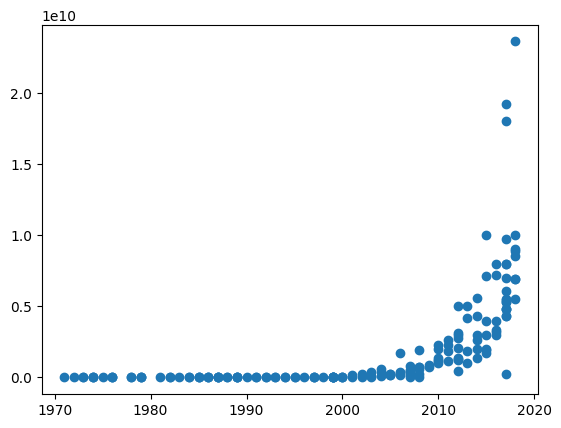

In [16]:
# plot the data
plt.scatter(X,y);

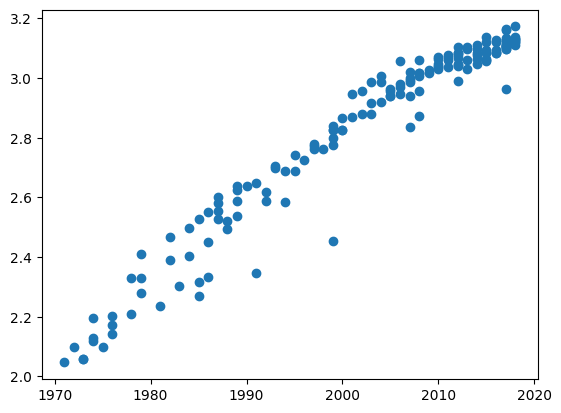

In [18]:
y = np.log(y)
plt.scatter(X,y);

In [19]:
X = X -X.mean()

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),

])

In [21]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9),   # because we did not standardize the data. if we had, we could just use 'adam'
    loss = 'MSE'

)

In [23]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


In [24]:
r = model.fit(X, y, epochs=200, callbacks =[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.6738 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8746 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1801 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1458 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0366 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2939 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8987 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3652 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5552 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0607 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8578 - learning_rate: 0.0010
Epoch 12/200
6/6 ━━━━━━━━━━━━━

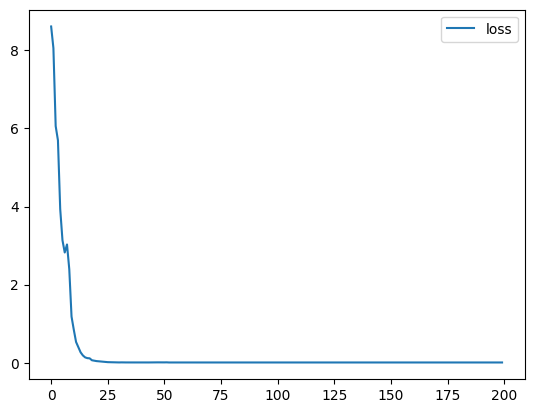

In [25]:
# plot the loss
plt.plot(r.history['loss'],label='loss')
plt.legend();

In [26]:
model.layers

[<Dense name=dense, built=True>]

In [27]:
model.layers[0].get_weights()

[array([[0.0215381]], dtype=float32), array([2.832345], dtype=float32)]

In [31]:
a = model.layers[0].get_weights()[0][0,0]
a

0.021538103